In [1]:
import numpy as np
from matplotlib import cm
import numpy as np
import os
import matplotlib.pyplot as plt
from lib import utils
from lib.get_manifold import get_color
def standard_fig_save(save_path=r"D:\projects\SF\toy_example\results\drawings", file_name="test", file_format="png"):
    # don't need to set format
    fig_filename = os.path.join(save_path, file_name + '.' + file_format)
    utils.makedirs(os.path.dirname(fig_filename))
    plt.savefig(fig_filename, dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
    plt.close()


# 全局设置 pdfa字体
# plt.rcParams['ps.useafm'] = True
# plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = True

# 全局设置times new roman字体
params={'font.family':'serif',
        'font.serif':'Times New Roman',
#         'font.style':'italic',
        'font.weight':'normal', #or 'blod'
        'font.size':20,#or large,small
        }
plt.rcParams.update(params)

label_font_s = 35
tick_font_s = 30
legend_font_s = 30
linewidth = 1

maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 
        'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 
        'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [2]:
ori_path = r"D:\projects\Datasets\Original\{}.csv".format("DDH_right")
ori_data = np.loadtxt(fname=ori_path, skiprows=1, delimiter=",")[:, 0:3]

In [3]:
data = np.loadtxt(fname=ori_path, skiprows=1, delimiter=",")[:,4:5]

In [4]:
data.shape

(2164, 1)

In [5]:
np.concatenate((ori_data, data), axis=1).shape

(2164, 4)

In [15]:
a = ['YC01_rel', 'YC02_rel', "DDH_left", "DDH_right"]
b = ['nflow', 'MLLE', 'Isomap', 'T-SNE', 'UMAP', 'HLLE', 'LTSA', 'LLE', 'WLLE']
name = a[1]
data_path = r"D:\projects\Datasets\Embeddings\nflow\{}_MF.csv".format(name)
ori_path = r"D:\projects\Datasets\Original\{}.csv".format(name)

In [3]:
ori_data = np.loadtxt(fname=ori_path, skiprows=1, delimiter=",")[:, 0:3]
data = np.loadtxt(fname=data_path, skiprows=0, delimiter=",")[:, 0:2]

In [4]:
def draw_all_manifold(dataset, manifold):
    for name in dataset:
        for m in manifold:
            data_path = r"D:\projects\Datasets\Embeddings\{}\{}_MF.csv".format(m, name)
            data = np.loadtxt(fname=data_path, skiprows=0, delimiter=",")[:, 0:2]
            ori_path = r"D:\projects\Datasets\Original\{}.csv".format(name)
            ori_data = np.loadtxt(fname=ori_path, skiprows=1, delimiter=",")[:, 0:3]
            
            save_path = r"D:\projects\Datasets\Embeddings\{}".format(m)
            x = data[:, 0]
            y = data[:, 1]
            c = get_color(name)
            
            plt. clf()
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
            plt.axis('off')

            ax0 = ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[16], alpha=1)
            standard_fig_save(save_path=save_path, file_name=name,file_format='pdf')
draw_all_manifold(a, b)

<Figure size 432x288 with 0 Axes>

In [6]:
def draw_2d_ori(data, name):
    x = data[:, 0]
    y = data[:, 1]
    c = get_color(name)
    
    plt. clf()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
    plt.axis('off')

    ax0 = ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[16], alpha=1)
    standard_fig_save(file_name=name+"_ori")

In [19]:
def draw_2d_embeddings(data, name):
    x = data[:, 0]
    y = data[:, 1]
    c = get_color(name)
    
    plt. clf()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), tight_layout=True)
    plt.axis('off')

    ax0 = ax.scatter(x, y, s=25, c=c, marker='o', cmap=maps[16], alpha=1)
    standard_fig_save(file_name=name, file_format="pdf")

In [7]:
for name in a:
    data_path = r"D:\projects\Datasets\Original\{}.csv".format(name)
    ori_data = np.loadtxt(fname=data_path, skiprows=1, delimiter=",")[:, 0:3]
    
    draw_2d_ori(ori_data, name)

<Figure size 432x288 with 0 Axes>

In [20]:
# 画出全部nflow
for name in a:
    data_path = r"D:\projects\Datasets\Embeddings\nflow\{}_MF.csv".format(name)
    data = np.loadtxt(fname=data_path, skiprows=0, delimiter=",")[:, 0:2]
    
    draw_2d_embeddings(data, name)

<Figure size 432x288 with 0 Axes>

In [8]:
c = get_color("YC01_rel")

In [9]:
def normed(train_data, normalization="mean_std"):
    for i in [0]:
        h = train_data[:, i]
        if normalization == 'max_min':
            temp = (h - h.min()) / (h.max() - h.min())
        elif normalization == 'mean_std':
            temp = (h - np.mean(h)) / np.std(h)
        elif normalization == 'nrom':
            # s.t. h全是正数
            temp = h / np.sum(h)
        else:
            temp = h
        train_data[:, i] = temp
    return train_data

<Figure size 432x288 with 0 Axes>

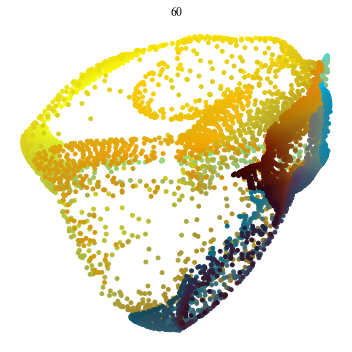

<Figure size 432x288 with 0 Axes>

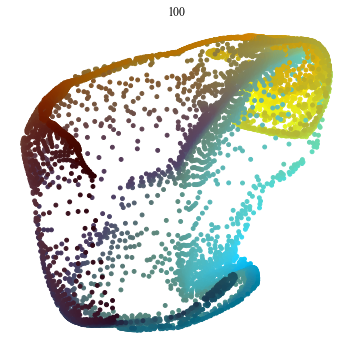

<Figure size 432x288 with 0 Axes>

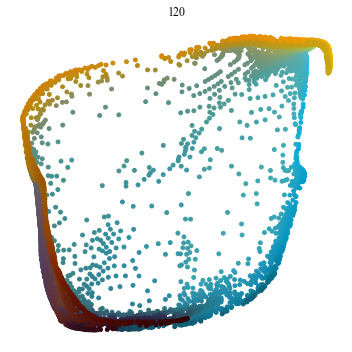

<Figure size 432x288 with 0 Axes>

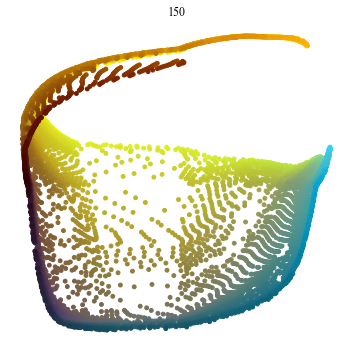

<Figure size 432x288 with 0 Axes>

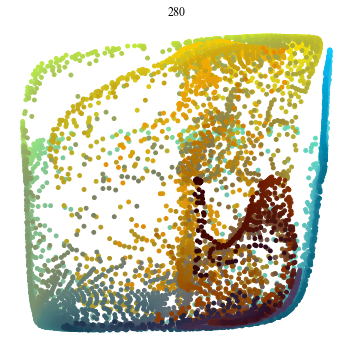

In [12]:
for i in [60, 100, 120, 150, 280]:
    path = r"D:\projects\SF\toy_example\results\YC01_rel\base_flow_one\YC01_rel{}.csv".format(i)
    data = np.loadtxt(fname=path, skiprows=0, delimiter=",")[:, 0:2]
    data = act(data, "sigmoid")
    x = data[:, 0]
    y = data[:, 1]
    plt. clf()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
    ax.set_title(i)
    plt.axis('off')

    ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
    plt.show()

In [11]:
def act(data, m="sigmoid"):
    if m == "max_min":
        d = (data - data.min()) / (data.max() - data.min())
    if m == "sigmoid":
        d = 1/(1+np.exp(data))
#     d = (np.exp(data) - np.exp(-data)) / (np.exp(data)+np.exp(-data))
    return d

<Figure size 432x288 with 0 Axes>

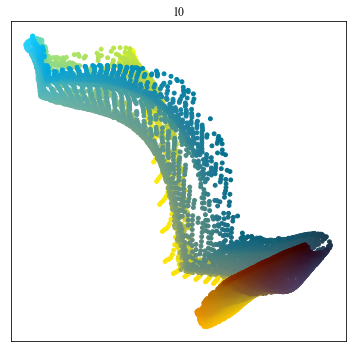

<Figure size 432x288 with 0 Axes>

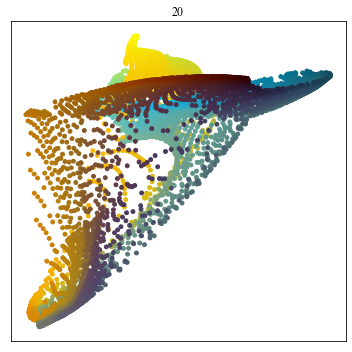

<Figure size 432x288 with 0 Axes>

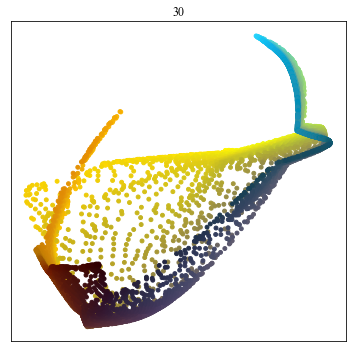

<Figure size 432x288 with 0 Axes>

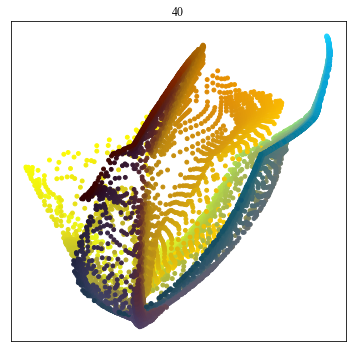

<Figure size 432x288 with 0 Axes>

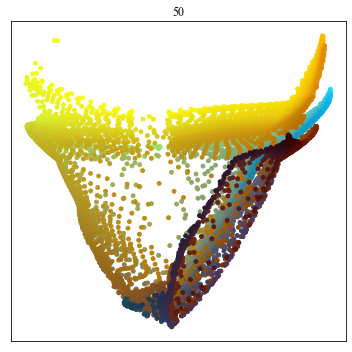

<Figure size 432x288 with 0 Axes>

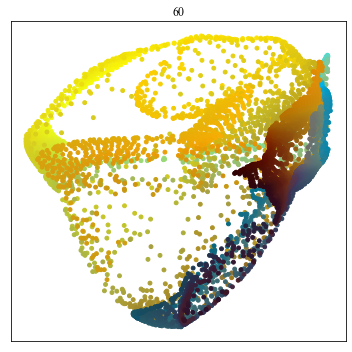

<Figure size 432x288 with 0 Axes>

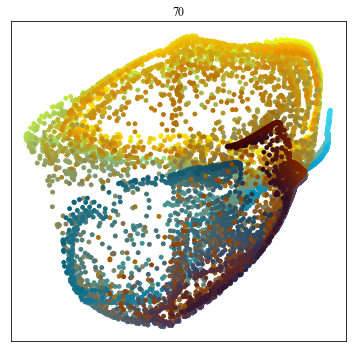

<Figure size 432x288 with 0 Axes>

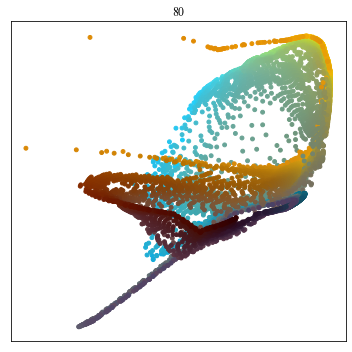

<Figure size 432x288 with 0 Axes>

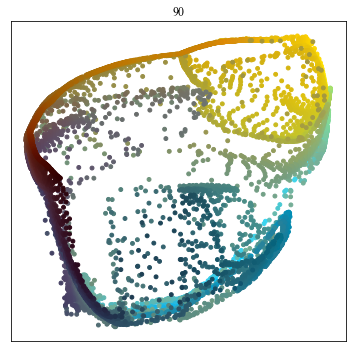

<Figure size 432x288 with 0 Axes>

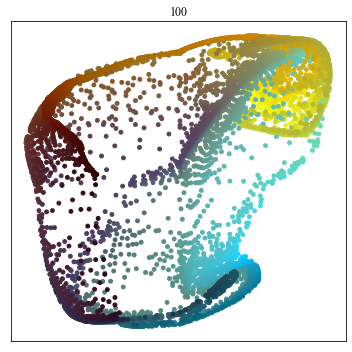

<Figure size 432x288 with 0 Axes>

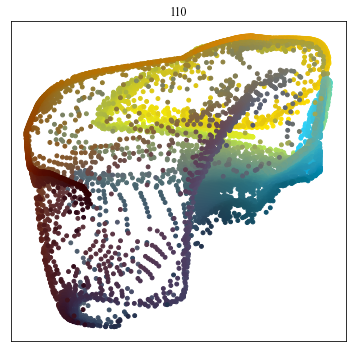

<Figure size 432x288 with 0 Axes>

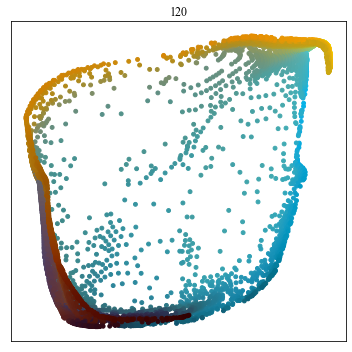

<Figure size 432x288 with 0 Axes>

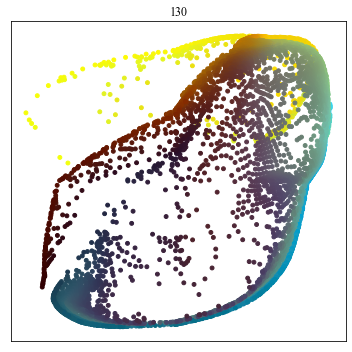

<Figure size 432x288 with 0 Axes>

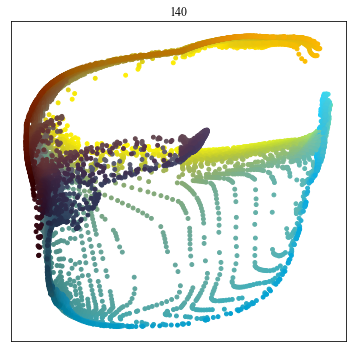

<Figure size 432x288 with 0 Axes>

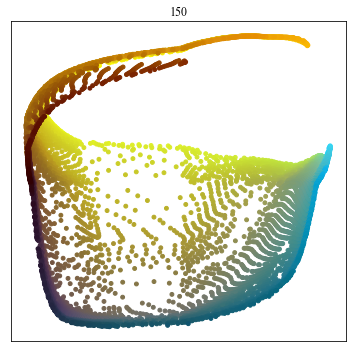

<Figure size 432x288 with 0 Axes>

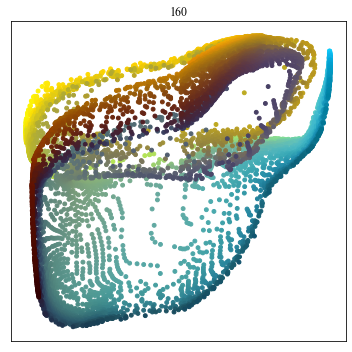

In [54]:
for i in np.arange(10, 170, 10):
    path = r"D:\projects\SF\toy_example\results\YC01_rel\base_flow_one\YC01_rel{}.csv".format(i)
    data = np.loadtxt(fname=path, skiprows=0, delimiter=",")[:, 0:2]

    data = act(data)
    x = data[:, 0]
    y = data[:, 1]
    
    plt. clf()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
    plt.axis('off')

    ax.scatter(x, y, s=15, c=c, marker='o', cmap=maps[1], alpha=1)
    ax.set_title(i)
    plt.show()

In [14]:
i=280
path = r"D:\projects\SF\toy_example\results\YC01_rel\base_flow_one\YC01_rel{}.csv".format(i)
data = np.loadtxt(fname=path, skiprows=0, delimiter=",")[:, 0:2]

plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
data = act(data)
x = data[:, 0]
y = data[:, 1]
plt.axis('off')
sp = 8000
ax.scatter(x[:sp], y[:sp], s=25, c=c[:sp], marker='o', cmap=maps[1], alpha=1)

# data[sp:] = act(data[sp:], "max_min") 
# ax.scatter(x[sp:], y[sp:], s=15, c=c[sp:], marker='o', cmap=maps[1], alpha=1)

# ax.set_title(i)
save_path = r"D:\projects\Datasets\Embeddings\nflow\YC01"
standard_fig_save(save_path=save_path, file_name="280",file_format='pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

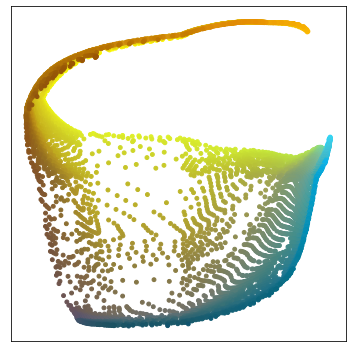

In [136]:
i=150
path = r"D:\projects\SF\toy_example\results\YC01_rel\base_flow_one\YC01_rel{}.csv".format(i)
data = np.loadtxt(fname=path, skiprows=0, delimiter=",")[:, 0:2]

plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
data = act(data)
x = data[:, 0]
y = data[:, 1]
plt.axis('off')
sp = 7000
ax.scatter(x[:sp], y[:sp], s=15, c=c[:sp], marker='o', cmap=maps[1], alpha=1)

# data[sp:] = act(data[sp:], "max_min") 
# ax.scatter(x[sp:], y[sp:], s=15, c=c[sp:], marker='o', cmap=maps[1], alpha=1)

# ax.set_title(i)
save_path = r"D:\projects\Datasets\Embeddings\nflow\YC01"
# standard_fig_save(save_path=save_path, file_name="280",file_format='pdf')
plt.show()